# Analysis of housing prices for a housing agency in Boston MA

My Jupyter Notebook on IBM Watson Studio - **Final Project in the Course "Statistics for Data Science with Python"**

_

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm

#### Loading in the Data Set of Boston Housing prices

In [42]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
# getting first understanding of the data
boston_df.info()
boston_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Descriptive Statistics of the Data Set and Visualizations

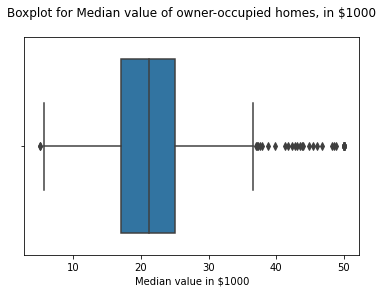

21.2

In [43]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x='MEDV', data=boston_df, orient = 'h').set(title='Boxplot for Median value of owner-occupied homes, in $1000\n', xlabel='Median value in $1000')
# ax.set(xlabel='Median value in $1000')
plt.show()
boston_df['MEDV'].median()

Interpretation: We can treat the distribution as normal with positive skewness.

[0. 1.]


Text(0.5, 1.0, 'Charles river variable distribution bar plot\n')

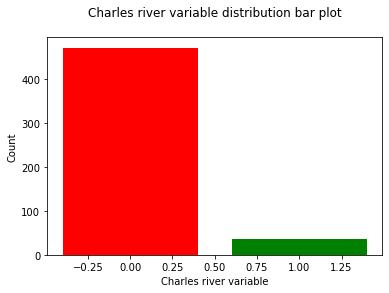

In [20]:
# Provide a  bar plot for the Charles river variable
print(boston_df.CHAS.unique())
pyplot.bar((boston_df.CHAS.unique())//1, boston_df.CHAS.value_counts(), color=['red','green'])
pyplot.xlabel('Charles river variable')
pyplot.ylabel('Count')
pyplot.title('Charles river variable distribution bar plot\n')

Interpretation: Obvious significant difference in the median value of houses bounded by the Charles river and not bounded. This hypothesis is tested below. 

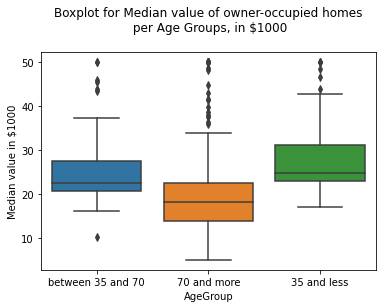

In [19]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

### a. Discretizing age in age groups

boston_df.loc[(boston_df['AGE'] <= 35), 'AgeGroup'] = '35 and less'
boston_df.loc[(boston_df['AGE'] > 35), 'AgeGroup'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AgeGroup'] = '70 and more'
boston_df

### b. Plotting with SeaBorn
ax = sns.boxplot(x='AgeGroup', y = 'MEDV', data=boston_df, orient = 'v').set(title='Boxplot for Median value of owner-occupied homes\n per Age Groups, in $1000\n', ylabel='Median value in $1000')
plt.show()
#boston_df['MEDV'].median()

Interpretation: The difference in median values of houses of each proportion of owner-occupied units is seen, but the significance should be tested (see below).

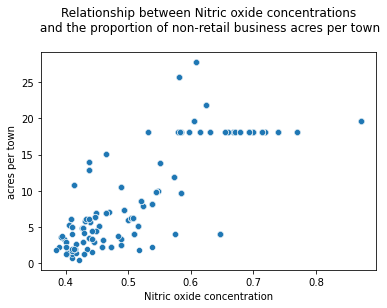

In [18]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the 
# proportion of non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title='Relationship between Nitric oxide concentrations\n and the proportion of non-retail business acres per town\n', xlabel='Nitric oxide concentration', ylabel='acres per town')
plt.show()


Interpretation: From the plot it is seen that possibly exist direct relation ship between these variables. Should be tested ( see below).

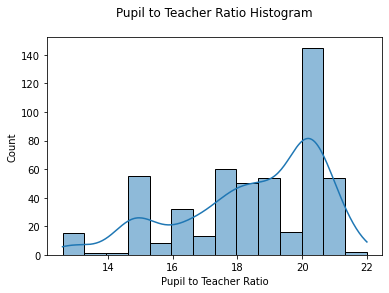

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64


In [27]:
# Create a histogram for the pupil to teacher ratio variable

#ax = sns.distplot(boston_df['PTRATIO'], kde = True)
ax = sns.histplot(boston_df['PTRATIO'], kde = True).set(title='Pupil to Teacher Ratio Histogram\n', xlabel='Pupil to Teacher Ratio')
plt.show()
print(boston_df['PTRATIO'].describe())

Interpretation: The distribution is negatively skewed. The mean is 18.4 with Std of 2.1. 

####  Several Hypotheses Testing:  Use the appropriate tests to answer the questions provided

**1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?**

State the hypothesis:

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not bounded by it")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")

In [34]:
# We can use the Levene's Test in Python to check test significance

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')
# !!!  since the p-value is LESS than 0.05 (pvalue=0.003238119367639829) we CAN NOT assume equality of variance, as such use below: equal_var = False

# Use the ttest_ind from the scipy_stats library

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)


Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:**  As the pvalue from the test is less than α = 0.05, we reject the H_0 and can say that there is a difference in median value of houses bounded by the Charles river or not.

--------------------------------------------------------------


**2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

State the hypothesis:

*   $H\_0: µ\_1 = µ\_2$ = µ\_3 ("there is no difference in Median value of houses for three age groups")
*   $H\_1:$  At least one of the means differ

In [37]:
# Test for equality of variance: We can use the Levene's Test in Python to check test significance

scipy.stats.levene(boston_df[boston_df['AgeGroup'] == '35 and less']['MEDV'],
                   boston_df[boston_df['AgeGroup'] == 'between 35 and 70']['MEDV'],
                   boston_df[boston_df['AgeGroup'] == '70 and more']['MEDV'],
                   center = 'mean')
                   # since the p-value is more than 0.05  (pvalue=0.06295337343259205), 
                   #the variancees are equal, we will move along

# separation of the three samples into three variables
thirtyfive_lower = boston_df[boston_df['AgeGroup'] == '35 and less']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AgeGroup'] == 'between 35 and 70']['MEDV']
seventy_older = boston_df[boston_df['AgeGroup'] == '70 and more']['MEDV']

# Running a one-way ANOVA:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:**  As the pvalue from the test is less than α = 0.05, we reject the H_0 and can say that at least one of the means of value of houses for three age groups differ from two others.

--------------------------------------------------------------

**3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

State the hypothesis:

*   $H\_0: $ There is NO evidence of correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1: $ There is evidence of correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [40]:
## X is the input variables (or independent variables)
X = boston_df['NOX']

## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           7.91e-98
Time:                        10:11:22   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**  The correlation is positive and strong (0.73). So, we can conlude that there is strong positive relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 

--------------------------------------------------------------

**4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

State the hypothesis:

*   $H\_0: $ There is NO impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
*   $H\_1: $ There is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [41]:
## X is the input variables (or independent variables)
X = boston_df['DIS']

## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        10:19:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**  The correlation is positive but weak (0.25). At the same time pvalue of B1 is less than 0.05, so we can reject the H_0. As a result we can say that the relationship could be described as

MEDV = 1.1 * DIS + 18.4 but the relationship is not strong (the coefficient of determination of 0.062 , ie Correlation Coefficient is 0.25)

--------------------------------------------------------------